In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Mon Nov 21 16:26:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.4 MB/s 
     |████████████████████████████████| 106 kB 68.8 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 2.3 MB 54.9 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 213 kB 71.5 MB/s 
     |████████████████████████████████| 278 kB 69.2 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 68 kB 7.4 MB/s 
     |████████████████████████████████| 46 kB 4.9 

In [4]:
import gradio as gr

In [2]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [31]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.6 kB/s 
     |████████████████████████████████| 6.0 MB 46.9 MB/s 
     |████████████████████████████████| 439 kB 71.6 MB/s 
     |████████████████████████████████| 1.7 MB 50.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [7]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

/root/.keras/datasets/flower_photos/roses/15172358234_28706749a5.jpg


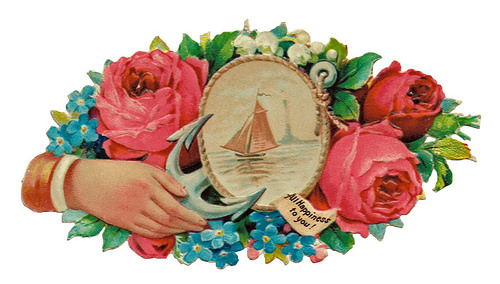

In [8]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [9]:
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory( 
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

32


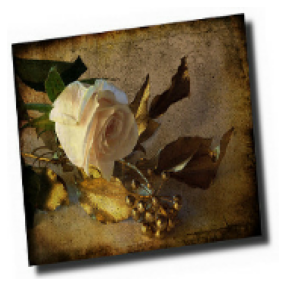

In [12]:
for image, label in train_ds.take(1):
  print(len(image))
  plt.figure(figsize=(5,5))
  plt.imshow(image[0].numpy().astype("uint8"))
  plt.axis("off")


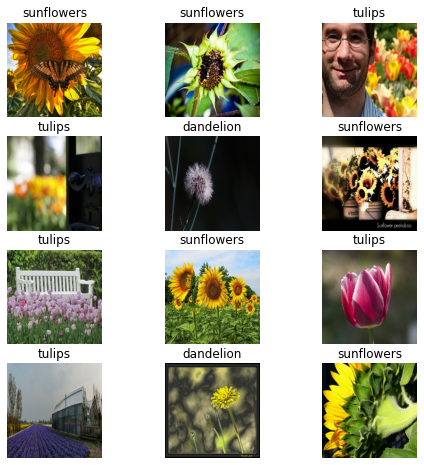

In [13]:
plt.figure(figsize=(8,8))

for images, labels in train_ds.take(1):
  for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [14]:
num_classes = len(class_names)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(152, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [15]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
epochs = 10
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/10
92/92 [==============================] - 12s 73ms/step - loss: 1.4646 - accuracy: 0.3839 - val_loss: 1.0746 - val_accuracy: 0.5790
Epoch 2/10
92/92 [==============================] - 6s 66ms/step - loss: 1.0407 - accuracy: 0.5869 - val_loss: 1.0551 - val_accuracy: 0.5695
Epoch 3/10
92/92 [==============================] - 6s 66ms/step - loss: 0.8473 - accuracy: 0.6713 - val_loss: 1.0207 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 6s 67ms/step - loss: 0.6253 - accuracy: 0.7609 - val_loss: 1.1109 - val_accuracy: 0.6144
Epoch 5/10
92/92 [==============================] - 6s 66ms/step - loss: 0.3983 - accuracy: 0.8563 - val_loss: 1.3350 - val_accuracy: 0.5886
Epoch 6/10
92/92 [==============================] - 8s 79ms/step - loss: 0.2447 - accuracy: 0.9206 - val_loss: 1.4755 - val_accuracy: 0.6240
Epoch 7/10
92/92 [==============================] - 7s 68ms/step - loss: 0.1527 - accuracy: 0.9503 - val_loss: 1.6480 - val_accuracy: 0.6335
Epoch 8/10
9

In [20]:
saved_model = model.save('/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Flower_classification/model.hdf5')

In [25]:
def predict_image(img):
  img_4d = img.reshape(-1, 180,180, 3)
  prediction = model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [26]:
image = gr.inputs.Image(shape=(img_height, img_width))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 21ms/step
Keyboard interruption in main thread... closing server.


In [35]:
import gradio as gr

male_words, female_words = ["he", "his", "him"], ["she", "hers", "her"]


def gender_of_sentence(sentence):
    male_count = len([word for word in sentence.split() if word.lower() in male_words])
    female_count = len(
        [word for word in sentence.split() if word.lower() in female_words]
    )
    total = max(male_count + female_count, 1)
    return {"male": male_count / total, "female": female_count / total}


demo = gr.Interface(
    fn=gender_of_sentence,
    inputs=gr.Textbox(value="She went to his house to get her keys."),
    outputs="label",
    interpretation="default",
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>